<IPython.core.display.Javascript object>


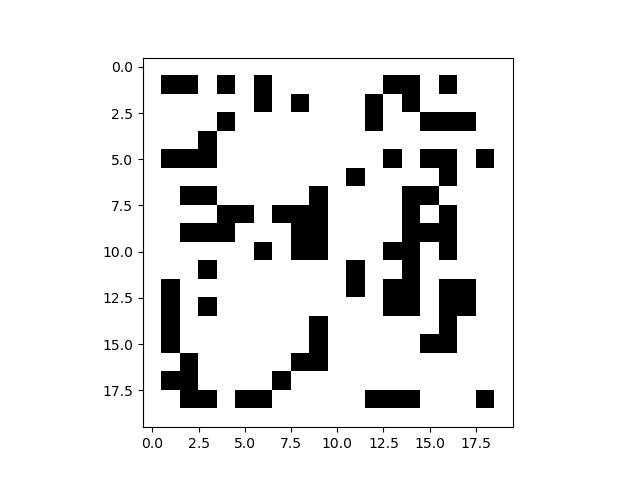

In [19]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


def randomGrid(N):
    return np.random.choice([255, 0], N*N, p=[0.5, 0.5]).reshape(N, N)

def addGlider(i, j, grid):
    glider = np.array([[0, 0, 255], [255, 0, 255], [0, 255, 255]])
    grid[i:i+3, j:j+3] = glider

def neighboursSum(i, j, m):

    total = int((m[i-1, j-1] + m[i-1, j] + m[i-1, j+1] 
                 + m[i, j-1] + m[i, j+1] + m[i+1, j-1] 
                 + m[i+1, j] + m[i+1, j+1])/255)
    return total

def update(matrix):
    
    N = matrix.shape[0]
    
    newmatrix = np.zeros(N*N).reshape(N, N)
    
    for i in range(1, N-1):
        for j in range(1, N-1):
            total = neighboursSum(i, j, matrix)
            
            if matrix[i, j] == 255:
                if(total < 2) or (total > 3):
                    newmatrix[i, j] = 0
                else:
                    newmatrix[i, j] = 255
            else:
                if total == 3:
                    newmatrix[i, j] = 255
    
    return newmatrix


obraz = randomGrid(20)

fig = plt.figure()


ims = []
for i in range(200):
    obraz = update(obraz)
    im = plt.imshow(obraz, cmap='Greys', animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

ani.save('dynamic_images.mp4')

plt.show()
